In [2]:
!wget "https://valencia.opendatasoft.com/api/explore/v2.1/catalog/datasets/rvvcca_d_horarios_2021-2022/exports/csv?lang=es&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B" > data.csv

--2023-04-13 19:05:02--  https://valencia.opendatasoft.com/api/explore/v2.1/catalog/datasets/rvvcca_d_horarios_2021-2022/exports/csv?lang=es&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B
Resolving valencia.opendatasoft.com (valencia.opendatasoft.com)... 52.29.97.146, 35.158.56.174
Connecting to valencia.opendatasoft.com (valencia.opendatasoft.com)|52.29.97.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘csv?lang=es&timezone=Europe%2FBerlin&use_labels=true&delimiter=;’

csv?lang=es&timezon     [         <=>        ]  24,69M   357KB/s    in 69s     

2023-04-13 19:06:12 (367 KB/s) - ‘csv?lang=es&timezone=Europe%2FBerlin&use_labels=true&delimiter=;’ saved [25887117]



In [7]:
!pip install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import holidays
import matplotlib.dates as mdates
import scipy
sns.set_theme()
sns.set_style("ticks")
semana=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]


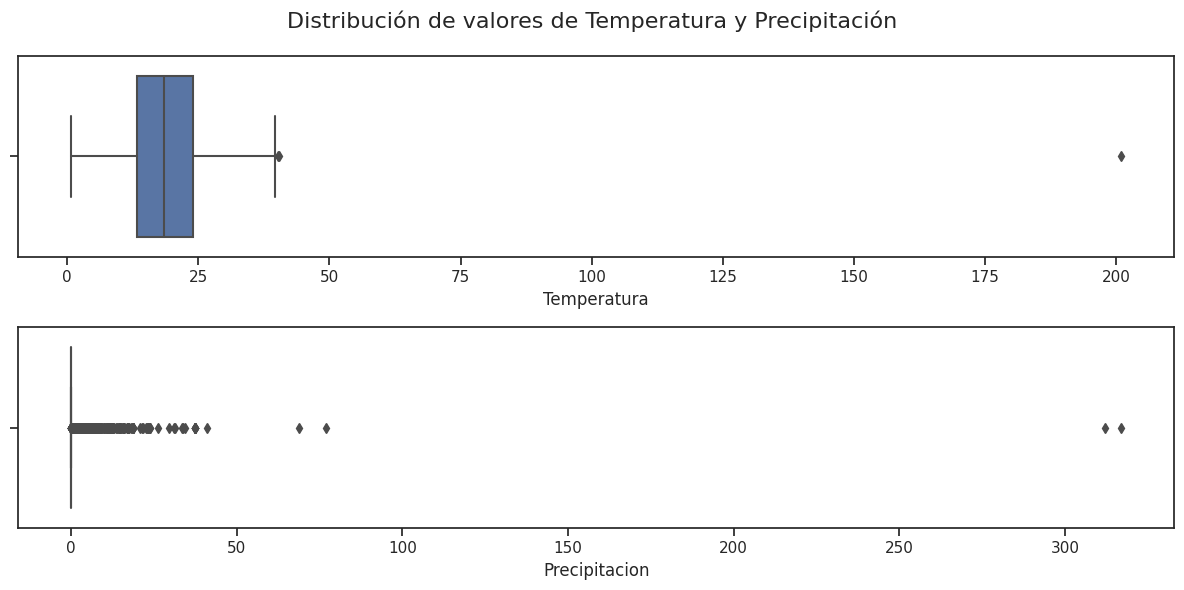

In [3]:
_df = pd.read_csv("data.csv",delimiter=";")

fig, (ax,ax1) = plt.subplots(figsize=(12,6),nrows=2)
fig.suptitle('Distribución de valores de Temperatura y Precipitación', fontsize=16)

sns.boxplot(_df,x="Temperatura",ax=ax)
sns.boxplot(_df,x="Precipitacion",ax=ax1)
fig.tight_layout()
plt.savefig("results/temp_prec_outliers.svg")
plt.show()
_df = _df[_df["Temperatura"] < 45]
_df = _df[_df["Precipitacion"] < 300]


In [4]:
_df["Estacion"].unique()

array(['Pista Silla', 'Politecnico', 'Moli del Sol', 'Viveros',
       'Puerto Moll Trans. Ponent', 'Valencia Centro',
       'Puerto llit antic Turia', 'Nazaret Meteo', 'Conselleria Meteo',
       'Bulevard Sud', 'Avda. Francia'], dtype=object)

In [3]:
_df["Hora"] = _df["Hora"].apply(lambda x : x[11:16])
_df["time"] = _df["Fecha"] + "T" +_df["Hora"]
_df["time"] = pd.to_datetime(_df["time"])
_df["Month"] = _df["time"].dt.month
_df.drop(columns=["Fecha baja","Fecha creacion"],inplace=True)
pd.options.plotting.backend = "plotly"
_df.set_index("time",inplace=True)
_df.sort_index(inplace=True)
_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122623 entries, 2021-01-01 00:53:00 to 2022-12-31 23:53:00
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Id                           122623 non-null  int64  
 1   Fecha                        122623 non-null  object 
 2   Dia de la semana             122623 non-null  object 
 3   Dia del mes                  122623 non-null  int64  
 4   Hora                         122623 non-null  object 
 5   Estacion                     122623 non-null  object 
 6   PM1                          8618 non-null    float64
 7   PM2.5                        68128 non-null   float64
 8   PM10                         68126 non-null   float64
 9   NO                           86155 non-null   float64
 10  NO2                          86153 non-null   float64
 11  NOx                          86154 non-null   float64
 12  O3                      

In [4]:
_df["Dia de la semana numerico"] = _df.index.to_series().dt.weekday
_df["weekend"] = _df["Dia de la semana numerico"] >= 5

es_holidays = holidays.ES()
_df["holidays"] = _df["Fecha"].apply(lambda x : x in es_holidays)
_df["weekend or holidays"] = _df["weekend"] | _df["holidays"]
_df["timedelta"] = pd.to_datetime(_df["Hora"])

season_map = {1:"Invierno",
              2:"Invierno",
              12:"Invierno",
              3:"Primavera",
              4:"Primavera",
              5:"Primavera",
              6:"Verano",
              7:"Verano",
              8:"Verano",
              9:"Otoño",
              10:"Otoño",
              11:"Otoño",}
_df["Season"] = _df["Month"].map(season_map)

/tmp/ipykernel_4154/1132985912.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _df["timedelta"] = pd.to_datetime(_df["Hora"])


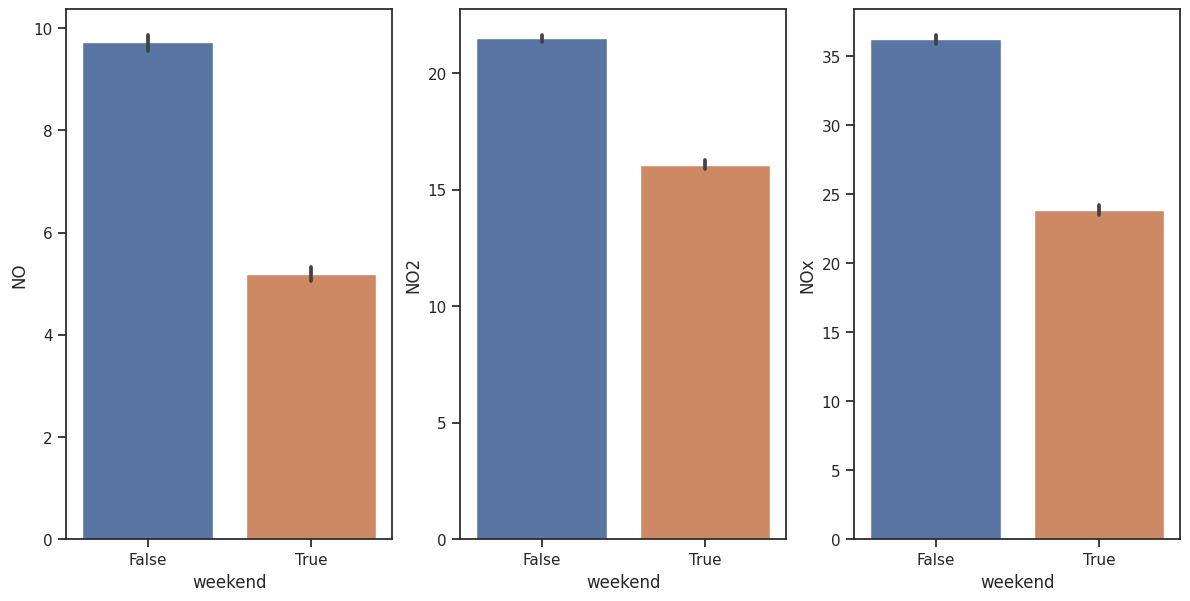

In [8]:
semana=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
fig, (ax,ax1,ax2) = plt.subplots(figsize=(12,6),ncols=3)
fig.tight_layout()
sns.barplot(_df,x="weekend",y="NO",ax=ax)
sns.barplot(_df,x="weekend",y="NO2",ax=ax1)
sns.barplot(_df,x="weekend",y="NOx",ax=ax2)
plt.show()

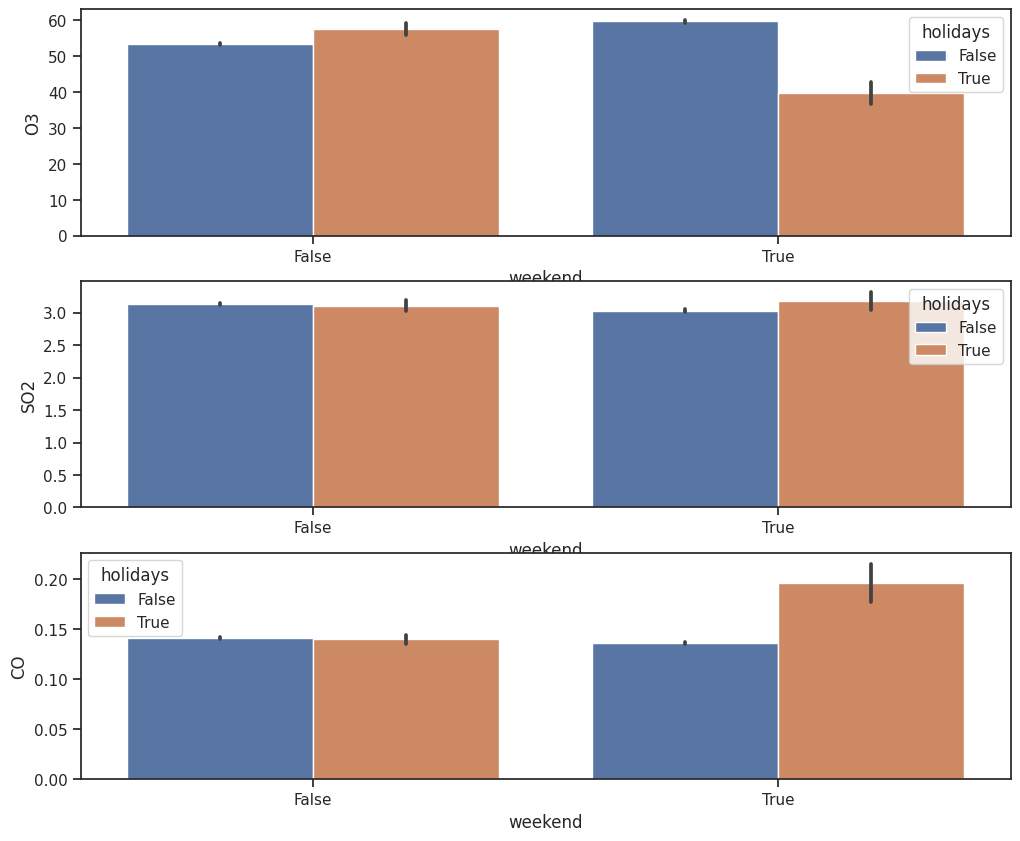

In [234]:
semana=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
fig, (ax,ax1,ax2) = plt.subplots(figsize=(12,10),nrows=3)
sns.barplot(_df,x="weekend",y="O3",ax=ax,hue="holidays")
sns.barplot(_df,x="weekend",y="SO2",ax=ax1,hue="holidays")
sns.barplot(_df,x="weekend",y="CO",ax=ax2,hue="holidays")
plt.show()

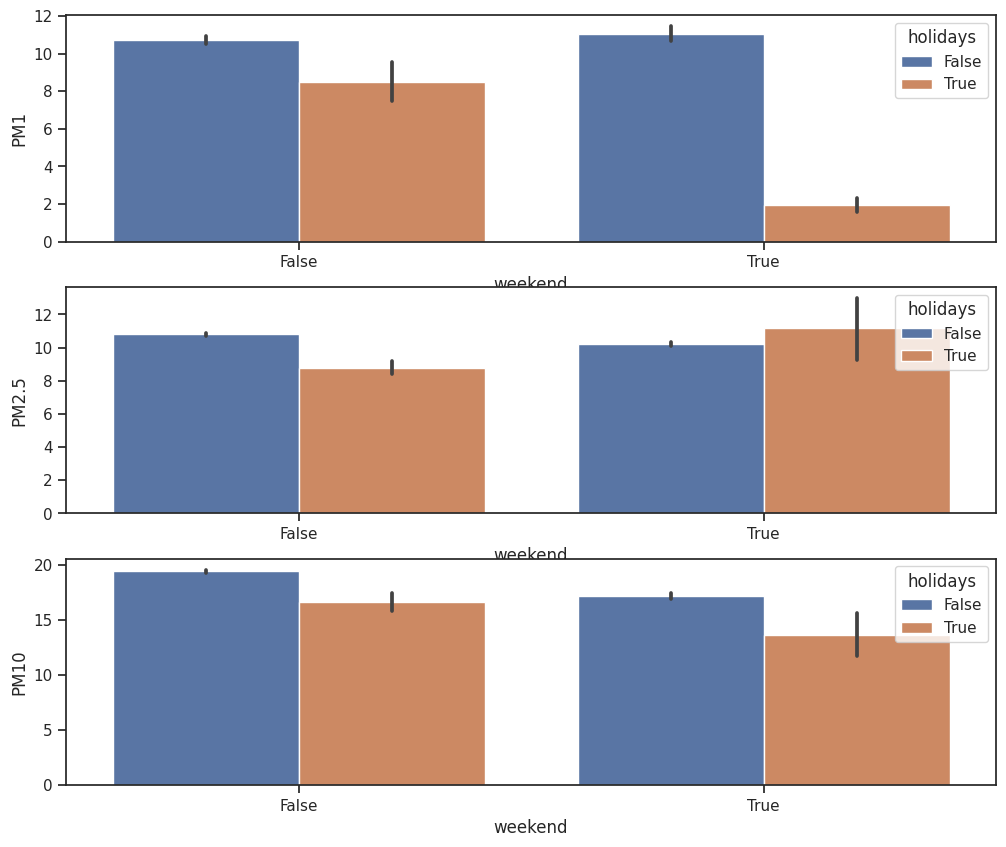

In [235]:
semana=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
fig, (ax,ax1,ax2) = plt.subplots(figsize=(12,10),nrows=3)
sns.barplot(_df,x="weekend",y="PM1",ax=ax,hue="holidays")
sns.barplot(_df,x="weekend",y="PM2.5",ax=ax1,hue="holidays")
sns.barplot(_df,x="weekend",y="PM10",ax=ax2,hue="holidays")
plt.show()

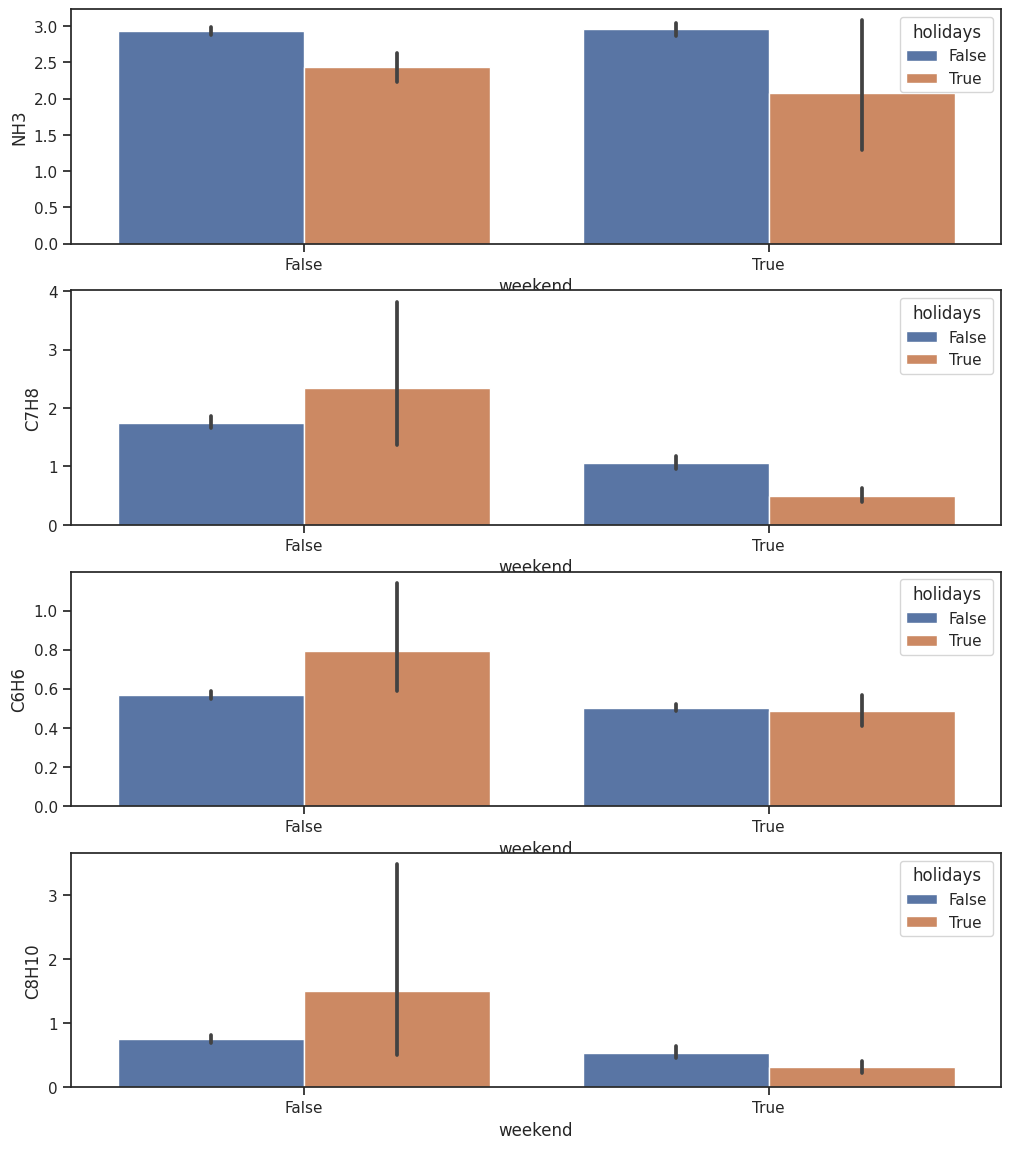

In [313]:
semana=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
fig, (ax,ax1,ax2,ax3) = plt.subplots(figsize=(12,14),nrows=4)
sns.barplot(_df,x="weekend",y="NH3",ax=ax,hue="holidays")
sns.barplot(_df,x="weekend",y="C7H8",ax=ax1,hue="holidays")
sns.barplot(_df,x="weekend",y="C6H6",ax=ax2,hue="holidays")
sns.barplot(_df,x="weekend",y="C8H10",ax=ax3,hue="holidays")
plt.show()

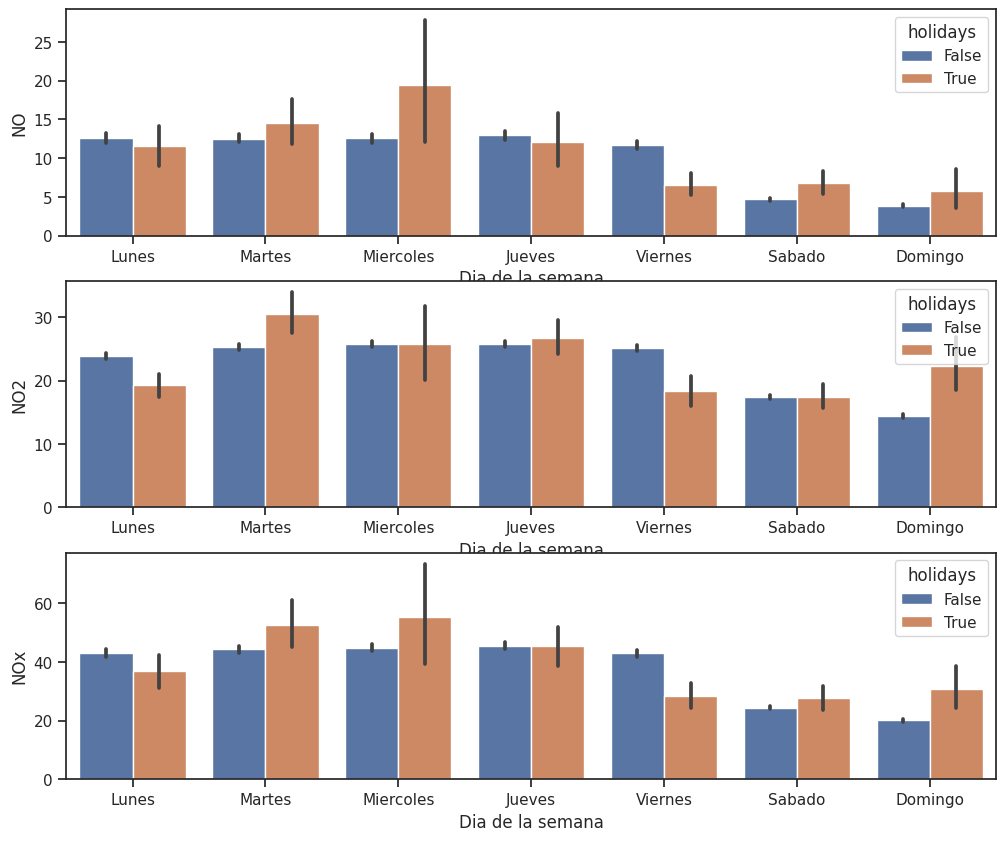

In [237]:
semana=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
fig, (ax,ax1,ax2) = plt.subplots(figsize=(12,10),nrows=3)
sns.barplot(_df,x="Dia de la semana",y="NO",ax=ax,order=semana,hue="holidays")
sns.barplot(_df,x="Dia de la semana",y="NO2",ax=ax1,order=semana,hue="holidays")
sns.barplot(_df,x="Dia de la semana",y="NOx",ax=ax2,order=semana,hue="holidays")
plt.show()

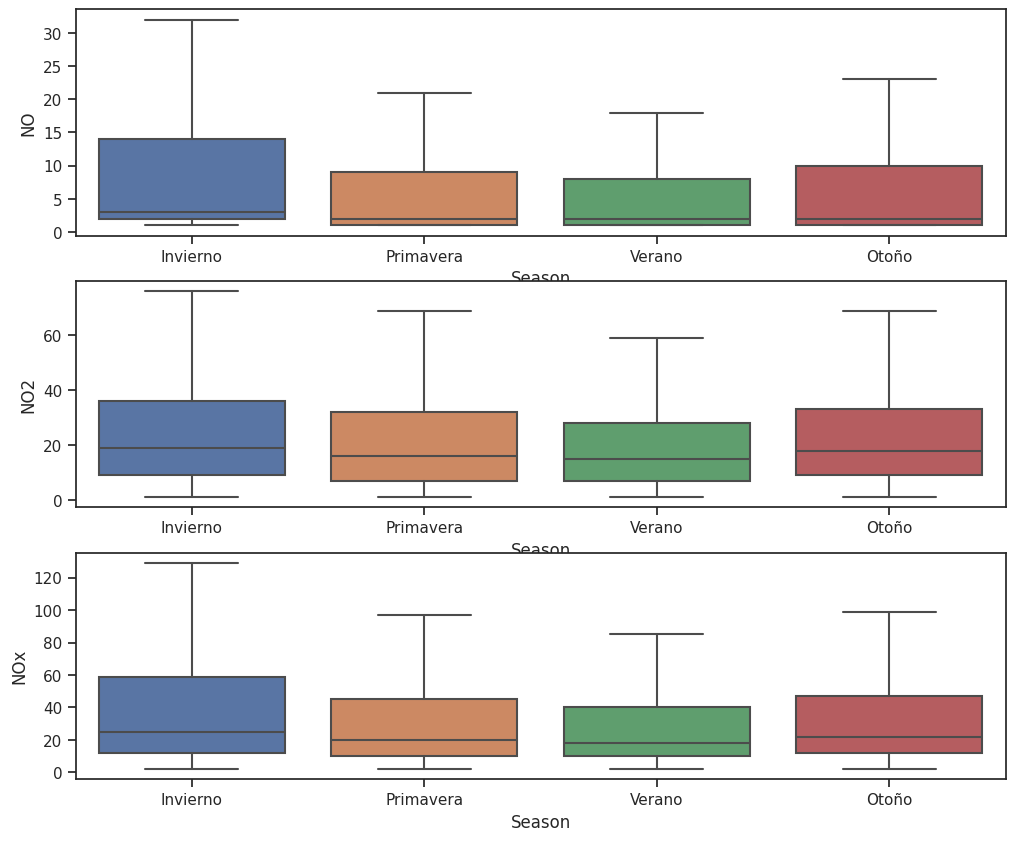

In [238]:
semana=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
fig, (ax,ax1,ax2) = plt.subplots(figsize=(12,10),nrows=3)
sns.boxplot(_df,y="NO",x="Season",ax=ax,showfliers=False)
sns.boxplot(_df,y="NO2",x="Season",ax=ax1,showfliers=False)
sns.boxplot(_df,y="NOx",x="Season",ax=ax2,showfliers=False)
plt.show()


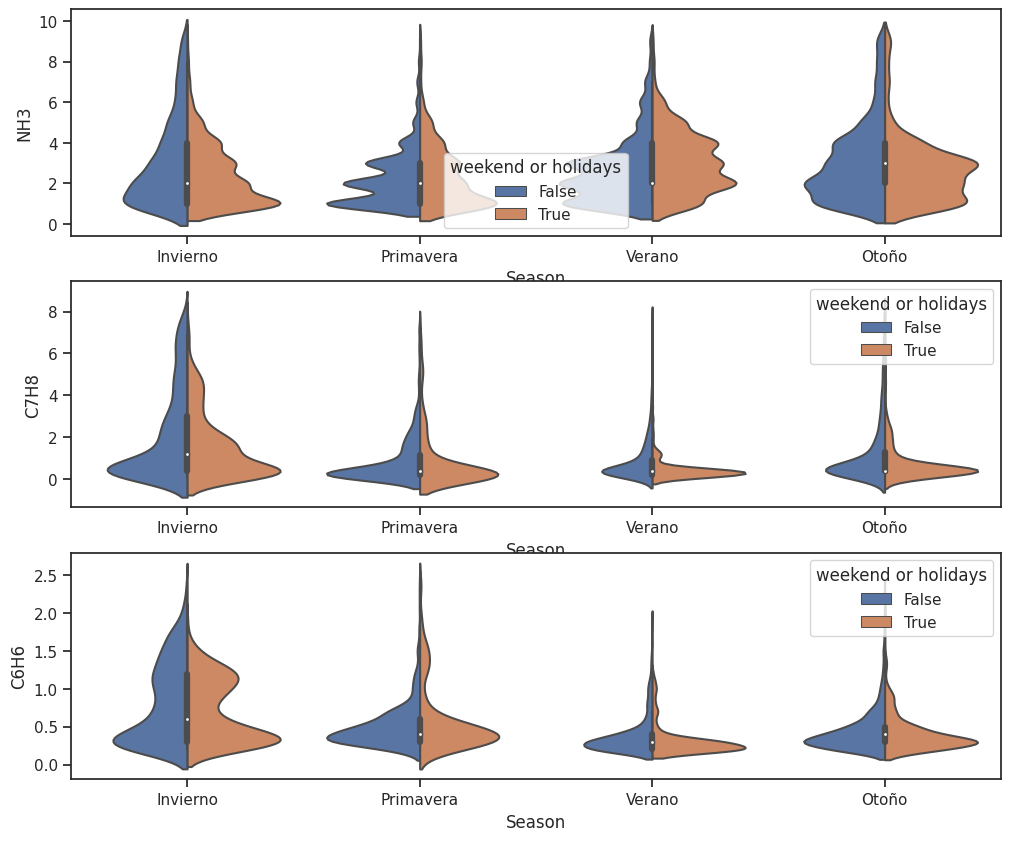

In [319]:
semana=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
fig, (ax,ax1,ax2) = plt.subplots(figsize=(12,10),nrows=3)
sns.violinplot(_df[_df["NH3"] < 10],y="NH3",x="Season",ax=ax,showfliers=False,hue="weekend or holidays",split=True)
sns.violinplot(_df[_df["C7H8"] < 8],y="C7H8",x="Season",ax=ax1,showfliers=False,hue="weekend or holidays",split=True)
sns.violinplot(_df[_df["C6H6"] < 2.5],y="C6H6",x="Season",ax=ax2,showfliers=False,hue="weekend or holidays",split=True)
plt.show()

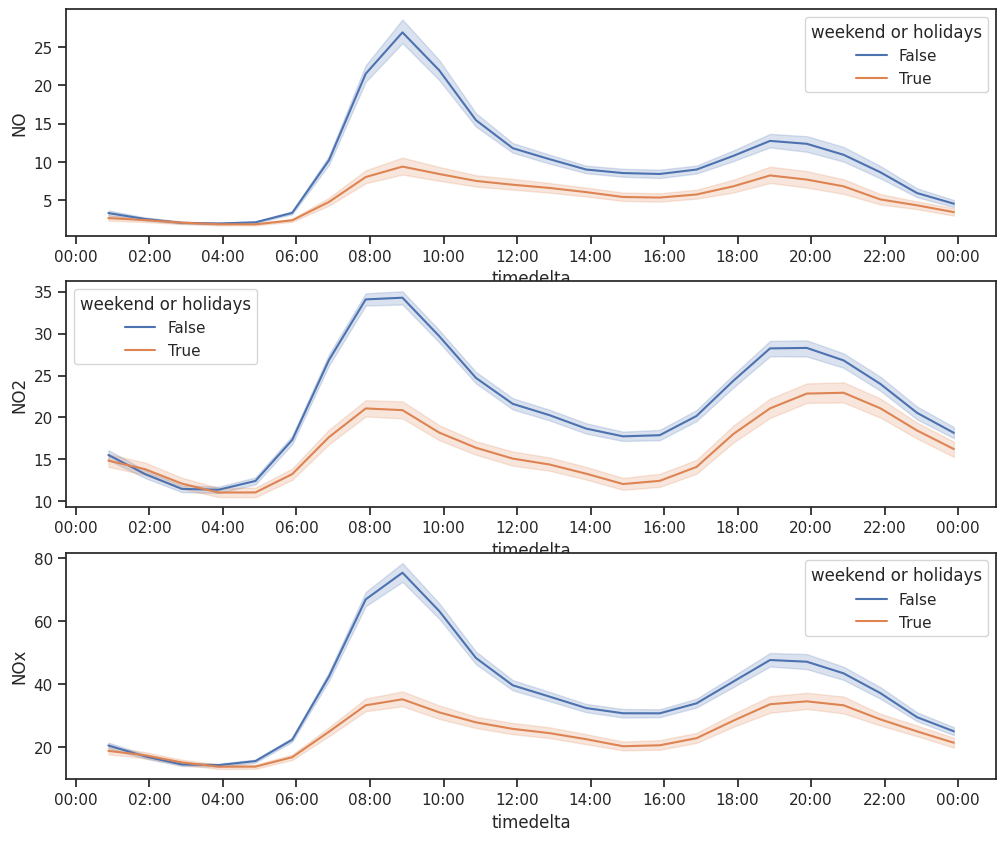

In [7]:
fig, (ax,ax1,ax2) = plt.subplots(figsize=(12,10),nrows=3)
sns.lineplot(_df.reset_index(),x="timedelta",y="NO",ax=ax,hue="weekend or holidays")
sns.lineplot(_df.reset_index(),x="timedelta",y="NO2",ax=ax1,hue="weekend or holidays")
sns.lineplot(_df.reset_index(),x="timedelta",y="NOx",ax=ax2,hue="weekend or holidays")

ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()


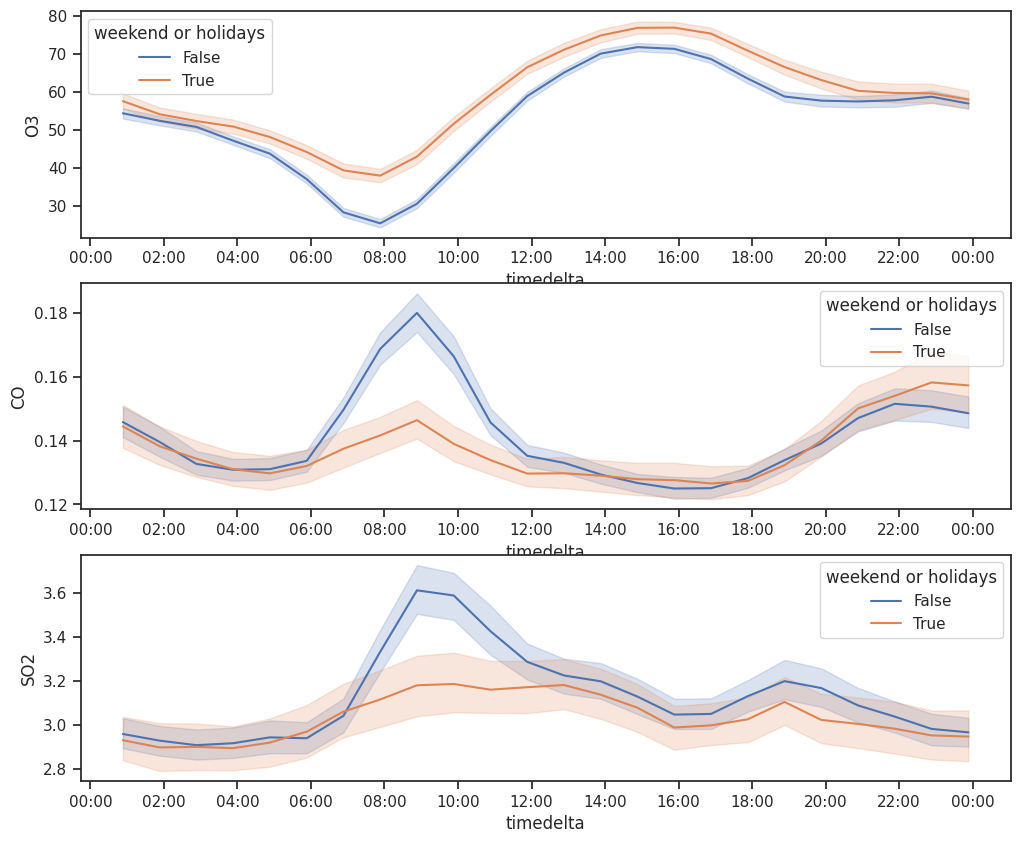

In [241]:
fig, (ax,ax1,ax2) = plt.subplots(figsize=(12,10),nrows=3)
sns.lineplot(_df.reset_index(),x="timedelta",y="O3",ax=ax,hue="weekend or holidays")
sns.lineplot(_df.reset_index(),x="timedelta",y="CO",ax=ax1,hue="weekend or holidays")
sns.lineplot(_df.reset_index(),x="timedelta",y="SO2",ax=ax2,hue="weekend or holidays")

ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

<Axes: xlabel='O3', ylabel='Count'>

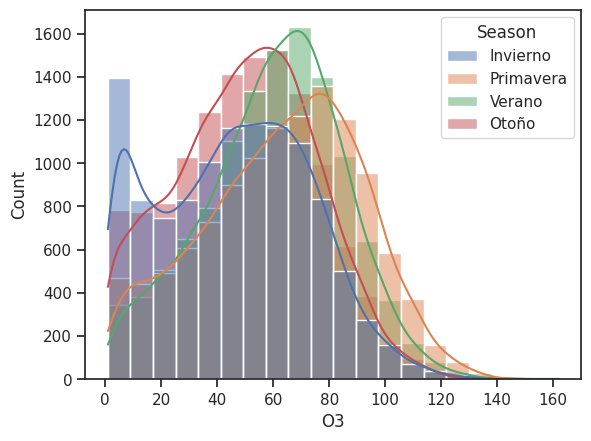

In [272]:
sns.histplot(_df.reset_index(),x="O3",bins=20,hue="Season",kde=True,multiple="layer")

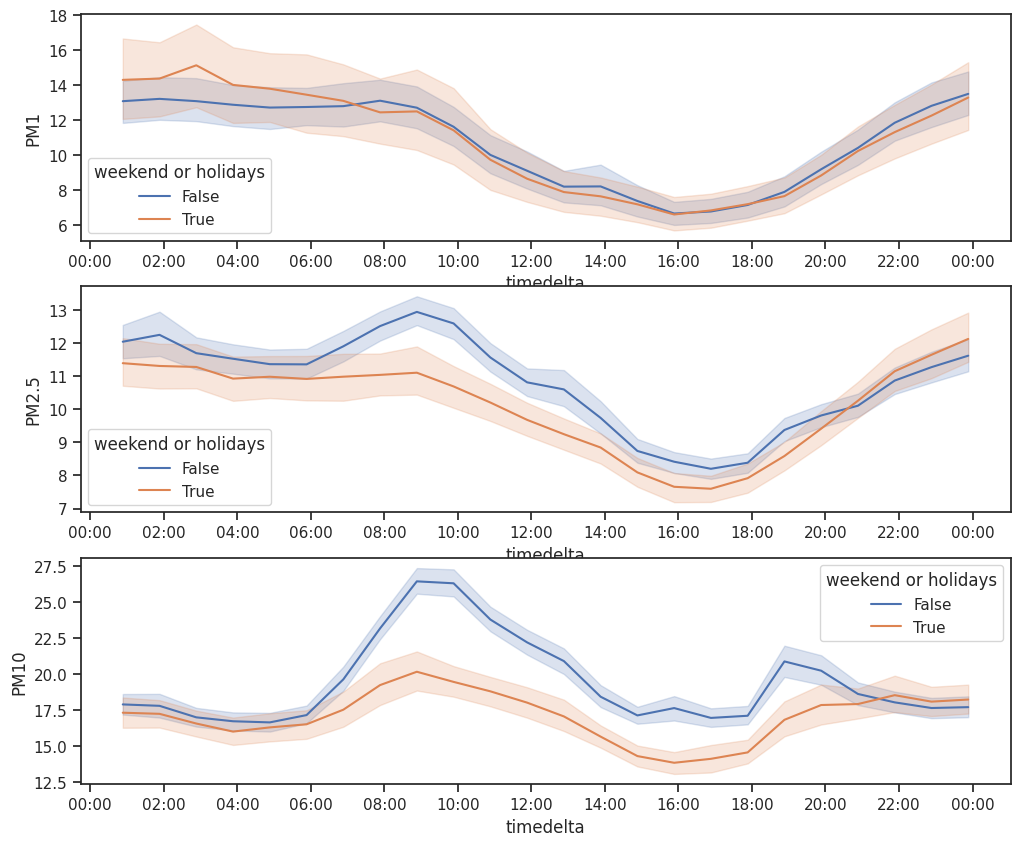

In [243]:
fig, (ax,ax1,ax2) = plt.subplots(figsize=(12,10),nrows=3)
sns.lineplot(_df.reset_index(),x="timedelta",y="PM1",ax=ax,hue="weekend or holidays")
sns.lineplot(_df.reset_index(),x="timedelta",y="PM2.5",ax=ax1,hue="weekend or holidays")
sns.lineplot(_df.reset_index(),x="timedelta",y="PM10",ax=ax2,hue="weekend or holidays")

ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

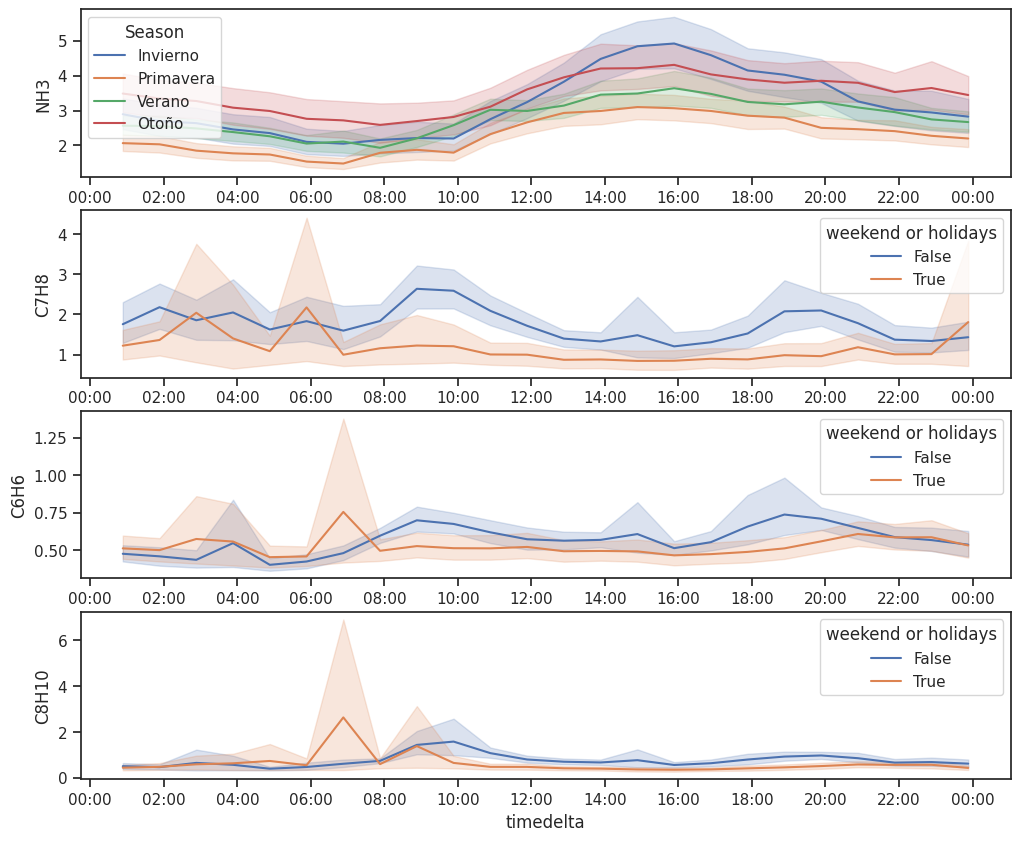

In [335]:
fig, (ax,ax1,ax2,ax3) = plt.subplots(figsize=(12,10),nrows=4)
sns.lineplot(_df.reset_index(),x="timedelta",y="NH3",ax=ax,hue="Season")
sns.lineplot(_df.reset_index(),x="timedelta",y="C7H8",ax=ax1,hue="weekend or holidays")
sns.lineplot(_df.reset_index(),x="timedelta",y="C6H6",ax=ax2,hue="weekend or holidays")
sns.lineplot(_df.reset_index(),x="timedelta",y="C8H10",ax=ax3,hue="weekend or holidays")

ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax3.xaxis.set_major_locator(mdates.HourLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

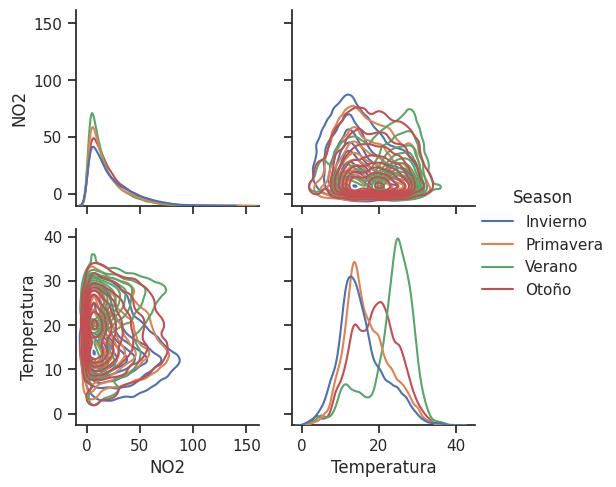

In [10]:
g = sns.PairGrid(_df.reset_index(), vars=["NO2","Temperatura"],hue="Season")
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)
g.add_legend()

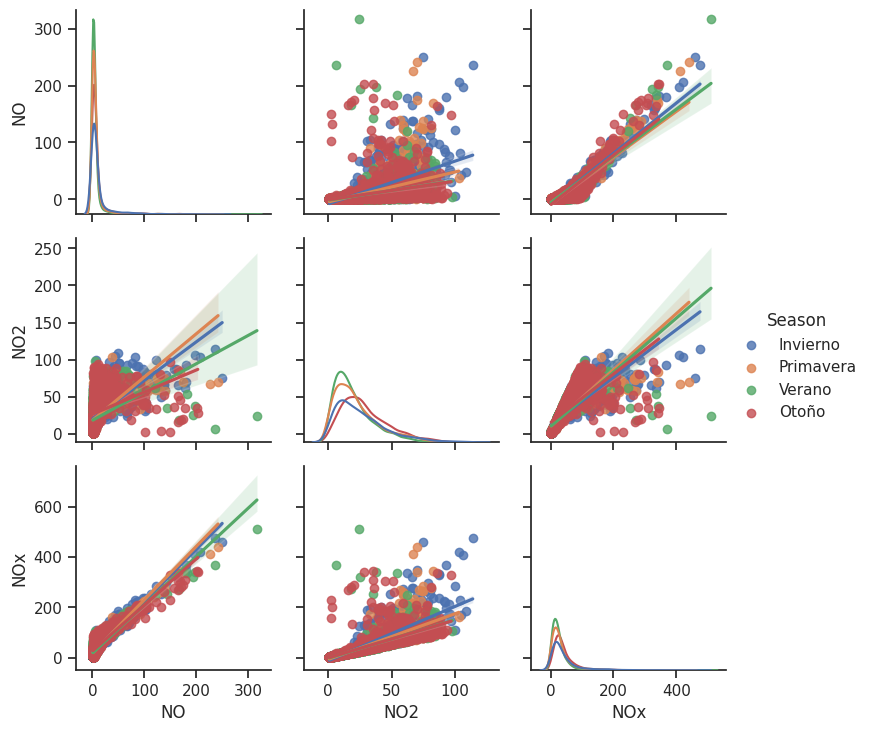

In [9]:
g = sns.PairGrid(_df[_df["NH3"] < 11].reset_index(), vars=["NO","NO2","NOx"],hue="Season")
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.regplot)
g.add_legend()

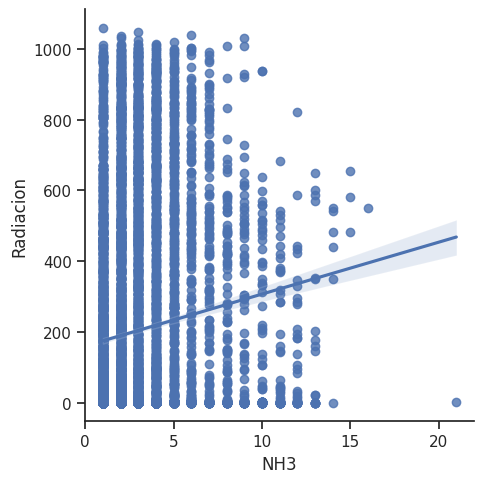

In [334]:
sns.lmplot(_df.reset_index(),x="NH3",y="Radiacion")

In [ ]:
df_smooth:pd.DataFrame = _df[["C7H8","C6H6","SO2","CO","C8H10"]].rolling(window="1D").mean().reset_index()

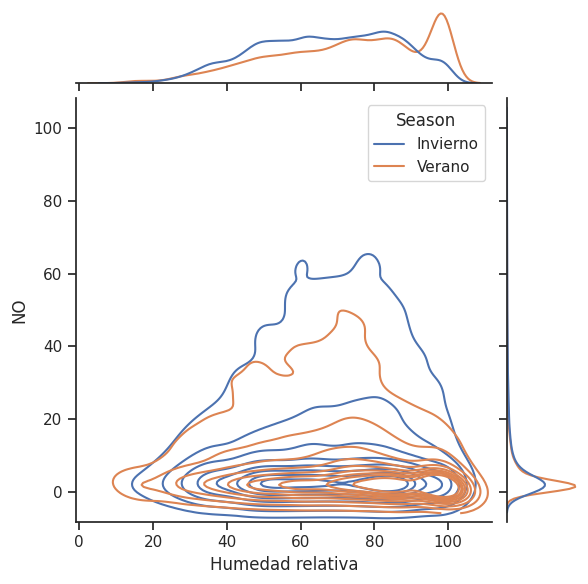

In [326]:
sns.jointplot(_df[((_df["Season"] == "Invierno" )|(_df["Season"] == "Verano")) & (_df["NO"] < 100) ].reset_index(),x="Humedad relativa",y="NO",hue="Season",kind="kde")

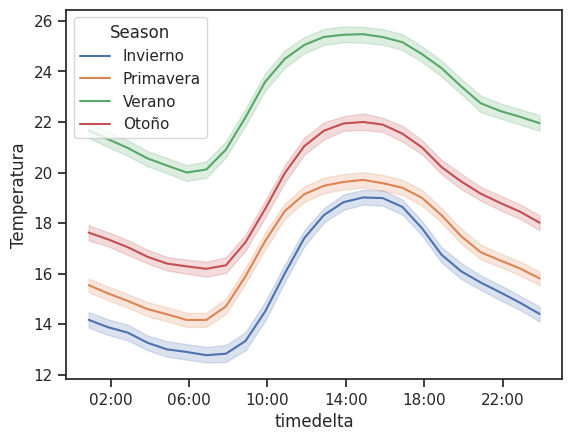

In [ ]:
fig, ax = plt.subplots()

sns.lineplot(_df.reset_index(),y="Temperatura",x="timedelta",ax = ax,hue="Season")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))


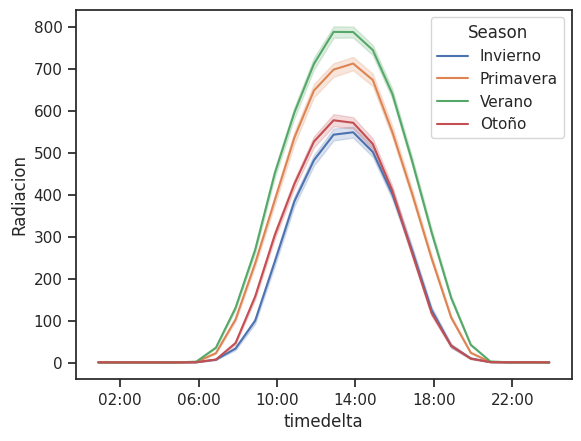

In [331]:
fig, ax = plt.subplots()

sns.lineplot(_df.reset_index(),y="Radiacion",x="timedelta",ax = ax,hue="Season")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
